# Heart Disease Prediction
#### By Alice Chang (for IOD Data Science & AI - Project 2)
##### 14 August 2021

### Import Libraries

In [1]:
import numpy as np # For Linear algebra
import pandas as pd # Exploratory Data Analysis

# Avoid warnings on version change 
import warnings
warnings.filterwarnings('ignore')

# For plotting graphs
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline    

In [2]:
# load data

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Explore the data
###### The dataset consists of 14 features(columns) and 303 rows

In [3]:
df.shape

(303, 14)

###### The rows have numeric values and titles of the columns are given

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### Data has no null values, check for duplicates

In [5]:
# Check for duplicates in the dataset

df[df.duplicated() == True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
# Removing duplicates

df.drop_duplicates(inplace=True)

print("After removing duplicates, the data now has 302 rows: ")
df.shape

After removing duplicates, the data now has 302 rows: 


(302, 14)

###### Data Attribute Description
###### age --> The person's age in years
###### sex --> The person's sex (1 = male, 0 = female)
###### cp --> The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
###### trestbps --> The person's resting blood pressure (mm Hg on admission to the hospital)
###### chol --> The person's cholesterol measurement in mg/dl
###### fbs --> The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
###### restecg --> Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
###### thalach --> The person's maximum heart rate achieved
###### exang --> Exercise induced angina (1 = yes; 0 = no)
###### oldpeak --> ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
###### slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
###### ca --> The number of major vessels (0-3)
###### thal --> A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
###### target --> Heart disease (0 = no, 1 = yes)

In [7]:
# Identify the target

df.groupby('output').size()

output
0    138
1    164
dtype: int64

###### 138 patients were diagnosed with no heart disease
###### 164 patients were diagnosed with heart disease

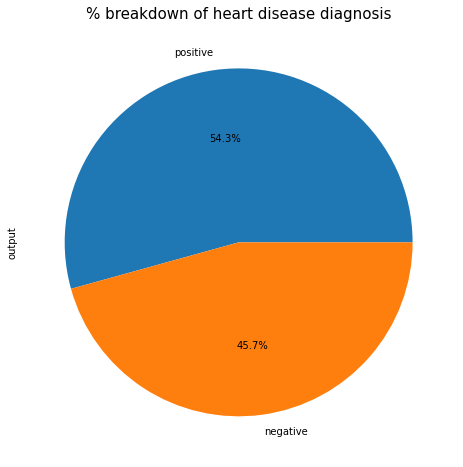

In [8]:
# plot a diagram to show % breakdown

fig=plt.gcf()
fig.set_size_inches(8,8)
label=['positive', 'negative']
df['output'].value_counts().plot.pie(labels=label, autopct="%1.1f%%");
plt.title('% breakdown of heart disease diagnosis', fontsize=15);

In [9]:
# Use crosstab to find which gender were more vulnerable

print('output 0 = No heart disease')
print('output 1 = Has heart disease')
print('sex 0 = female')
print('sex 1 = male')
gender = pd.crosstab(df['sex'], df['output'])
gender

output 0 = No heart disease
output 1 = Has heart disease
sex 0 = female
sex 1 = male


output,0,1
sex,,
0,24,72
1,114,92


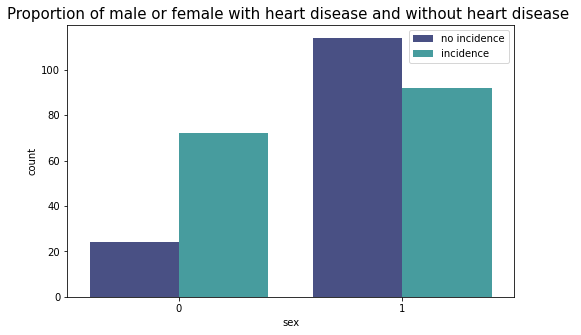

In [10]:
# Use diagram to show the proportion of gender prone to heart disease

fig=plt.gcf()
fig.set_size_inches(8,5)

sns.countplot(data=df, x='sex', hue='output', palette='mako')

#gender.plot(kind='bar', stacked=False, color=['red', 'blue']);
plt.title('Proportion of male or female with heart disease and without heart disease ', fontsize=15);
plt.legend(['no incidence','incidence']);

In [11]:
# Find the average for each attribute (columns) based on heart disease status

print('output 0 = No heart disease')
print('output 1 = With heart disease')
df.groupby('output').mean()

output 0 = No heart disease
output 1 = With heart disease


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [12]:
# # Visualise the data with a graph

# pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
# plt.title('Heart Disease Frequency based on Age', fontsize=14)
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

In [13]:
# compute top 10 ages which have the highest incidence ranked according to the number of incidences (descending)

df_output_1 = df[df['output']==1]   # compute new dataframe with incidence of 1
age_top10 = df_output_1.age.value_counts(ascending=False).head(10).to_frame() # value counts by descending order top 10
age_top10.reset_index(inplace=True)
age_top10.rename(columns=({'index':'age','age':'count'}),inplace=True)
age_top10 = age_top10.age # display only age (not value counts)

In [14]:
age_top10

0    54
1    41
2    51
3    52
4    44
5    42
6    57
7    58
8    53
9    45
Name: age, dtype: int64

In [15]:
# compute new dataframe consisting only of top 10 ages in "age_top10"

age_top10_df = pd.DataFrame()
add = []
for i in age_top10:  # extracting ages in "age_top10" by iteration
    _=df_output_1[df_output_1['age']==i] # capture the ages using iterator "i"
    add.append(_)
age_top10_df = pd.concat(add)  # concatenate to form a new dataframe

In [16]:
# review

age_top10_df.head() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1


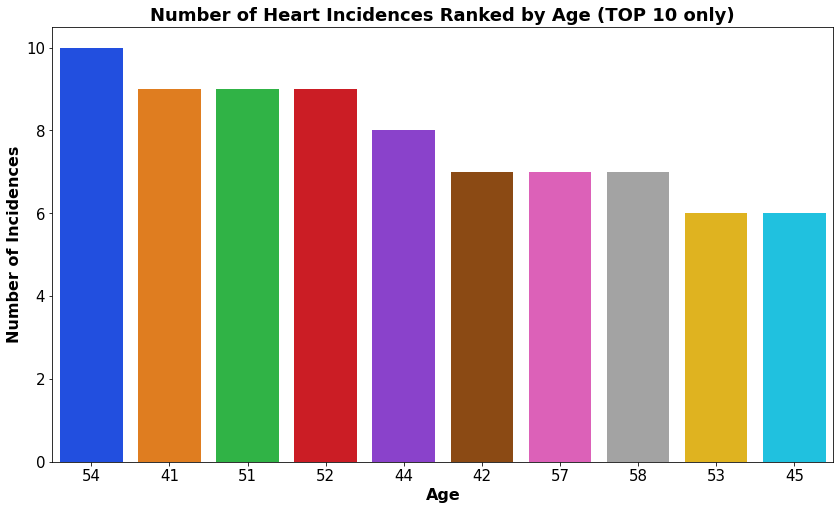

In [17]:
# plot heart incidences and rank by age

fig=plt.gcf()
fig.set_size_inches(14,8)

sns.countplot(data = age_top10_df, x='age', palette='bright', order=age_top10);
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('Number of Incidences', fontsize=16, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Number of Heart Incidences Ranked by Age (TOP 10 only)', fontsize=18, fontweight='bold')
plt.show()

### Explore the correlations

In [18]:
# Produce a correlation matrix to reveal how independent features within the data affect the output (with heart disease)

correlations = df.corr()
pd.DataFrame(correlations['output']).sort_values(by='output', ascending=False)

,output
output,1.000000
cp,0.432080
thalachh,0.419955
slp,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trtbps,-0.146269
age,-0.221476
sex,-0.283609


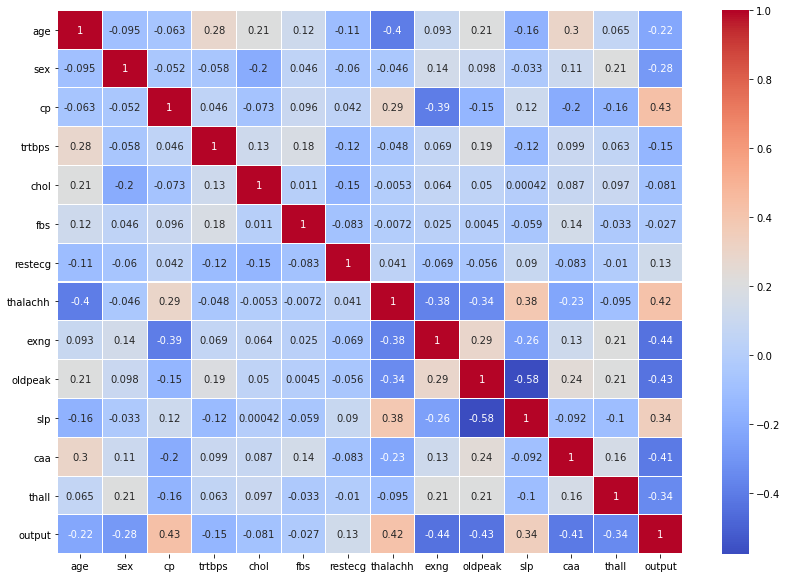

In [19]:
# Use heatmap to visualise the correlation between independent features and target(output).

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), linewidths=.02, annot = True, cmap='coolwarm')
plt.show()

#### The positive correlations:

##### 1. chest pain (cp) = output
##### 2. heart rate (thalachh) = output
##### 3. slope of heart rate during exercise (slp) = output
##### 4. electrographic measure when at rest = output

### Modelling

In [20]:
# Import sklearn libraries for logistic regression modelling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
# Define X and y

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Split the datasets for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=2)

Accuracy :  0.9024390243902439


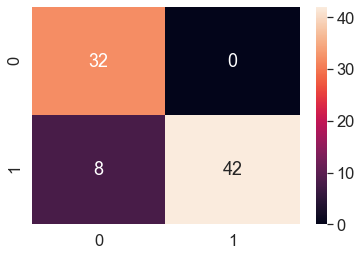

In [23]:
# Create and fit the model

df_lr = LogisticRegression()
df_lr.fit(X_train, y_train)

# Making predictions

y_pred = df_lr.predict(X_test)

# Checking the Accuracy of predictions

print("Accuracy : ", df_lr.score(X_test, y_test))

#Plot the confusion matrix

sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [24]:
# label confusion matrix by converting it into a dataframe

def deconfusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    
    cm = {
        'Predicted (Positive)': [tp, fp],
        'Predicted (Negative)': [fn, tn],
    }

    df = pd.DataFrame(cm, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
                      index=['Actual (Positive)', 'Actual (Negative)'])
    
    return df
    
dcm = deconfusion_matrix(y_test, y_pred)
dcm

,Predicted (Positive),Predicted (Negative)
Actual (Positive),42,0
Actual (Negative),8,32


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [26]:
# Generate the prediction values for each of the test observations using predict_proba() function 
preds = df_lr.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

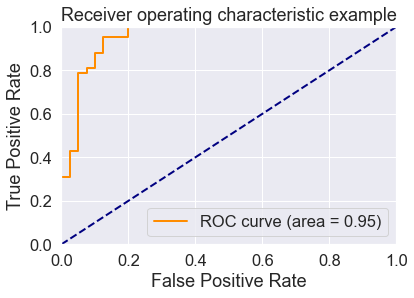

In [27]:
# Plot the ROC Curve

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

###### The ROC AUC curve gives 95% True Positive Rate which means the Logistic Regression Model is suitable. 

In [28]:
# Double confirm accuracy of the findings

from sklearn.metrics import precision_score, recall_score, f1_score 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.84
Recall: 1.0
F1 score: 0.9130434782608696


##### Precision Score of 84%  precision on prediction for those with actual heart disease.
##### Recall Score of 100% on actual heart disease and were predicted correctly.
##### F1 Score of 91.3% assesses the reliability of both Precision and Recall Scores.